In [1]:
import pandas as pd
import MarineDNA_Classic as md
import plotly.express as px
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

%load_ext autoreload
%autoreload 2

ModuleNotFoundError: No module named 'pandas'

In [2]:
import sklearn

In [3]:
sklearn.__version__

'1.2.2'

### Import the data

In [4]:
file1 = "../Data/merged_data/no_duplicates/Merged2018_16S_otu_filtered.csv"
file2 = "../Data/merged_data/no_duplicates/Merged2018_18S_otu_filtered.csv"
asvs_16S = pd.read_csv(file1, index_col=0)
asvs_18S = pd.read_csv(file2, index_col=0)

### 01. Random draws of the ASV count data

In [5]:
# one random draw
ran_lo_16S = md.ranRelPct(asvs_16S)
ran_lo_18S = md.ranRelPct(asvs_18S)
ran_lo_16S.head(3)

,ASV_1,ASV_2,ASV_3,ASV_4,ASV_5,ASV_6,ASV_7,ASV_8,ASV_9,ASV_10,...,ASV_8120,ASV_8124,ASV_8125,ASV_8126,ASV_8127,ASV_8128,ASV_8129,ASV_8130,ASV_8132,ASV_8133
CN18Fc43_5_eDNA,-3.155015,-1.945488,-3.378410,-7.188581,-5.198552,-4.365477,-5.808667,-4.476509,-3.372602,-4.008598,...,-13.350237,-10.203872,-10.261561,-12.842581,-10.624522,-11.169263,-10.132744,-11.265096,-11.710576,-11.242311
CN18FESPkoa_SC58,-3.065901,-1.994863,-3.567997,-6.827136,-5.003771,-4.187768,-5.824563,-4.542914,-2.872891,-4.230169,...,-10.805139,-9.900254,-11.299666,-12.633307,-10.813645,-11.493865,-14.643173,-13.646224,-10.239582,-16.382004
CN18FESPkoa_SC43,-3.182165,-1.825833,-3.317963,-6.600422,-4.878955,-4.125611,-5.583561,-4.481335,-2.961002,-4.216138,...,-13.213244,-12.425379,-11.373472,-11.142120,-11.573270,-11.253187,-9.657654,-15.790520,-10.951877,-11.226980


## 02. PCAs using the random draws

### Perform single PCAs

In [18]:
pca_results_16S = md.doPCA(ran_lo_16S)
pca_results_18S = md.doPCA(ran_lo_18S)
pca_results_16S["scores"]

array([[-57.36263513,  -1.02706115,  16.33661477, ...,  27.602283  ,
        -15.39222967,  12.6241144 ],
       [-57.03111527,  -3.8044483 ,  11.60325039, ...,   5.81414969,
         -2.55178581,  -9.17469756],
       [-60.78974801,  -2.34828737,   8.33789449, ...,   4.66725347,
         -5.6566885 ,   3.06108665],
       ...,
       [ 31.86639962,  16.29130788,  15.17729746, ...,  13.75774979,
         -0.15272658,  -2.9349443 ],
       [  4.98068069, -20.03400347, -53.77761554, ...,  -2.91161738,
         -4.30386271,  -1.6699346 ],
       [ 36.10645652, -32.0964878 ,  -6.86895165, ..., -11.51891042,
         16.93818013,   1.92896279]])

### Hierarchical clustering of random log-odds draw

#### Need these labels for the PCA; main clustering analysis comes later

In [7]:
# Assign 4 clusters arbitrarily
labels_16S = md.doClustering(ran_lo_16S, 4)
labels_18S = md.doClustering(ran_lo_18S, 4)
print(labels_16S)
print()
print(pd.DataFrame(np.array(np.unique(labels_16S, return_counts=True)).T))

['1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '3' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '3' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '2' '2' '0' '2' '0' '0' '0' '0' '0' '0' '1' '2'
 '0' '2' '0' '3' '0' '0' '0' '0' '2' '0' '2' '0' '0' '2' '2' '0' '0' '2'
 '2' '0' '0' '2' '2' '0' '0' '2' '2' '2' '0' '0' '2' '2' '0' '2' '0' '2'
 '0' '0' '2' '0' '0' '2' '0' '0' '2' '2' '0' '0' '2' '2' '0' '2' '0' '2'
 '0' '0' '2' '2' '0' '2' '0' '2' '2' '0' '0' '2' '2' '0' '0' '0' '2' '2'
 '2' '0' '0' '2' '2']

   0   1
0  0  47
1  1  41
2  2  40
3  3   3


### Visualize single PCAs on first two PCs

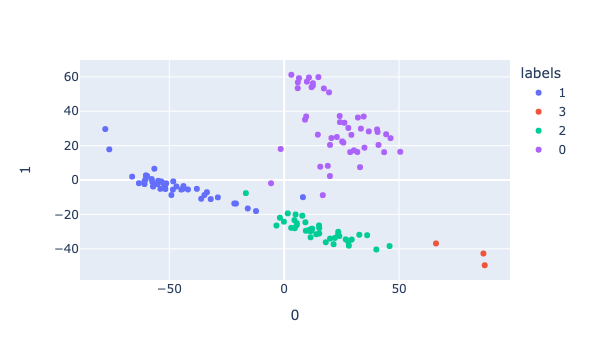

In [19]:
# 16S
scores_16S = pd.DataFrame(pca_results_16S["scores"])
scores_16S["labels"] = labels_16S
fig_16S = px.scatter(
    scores_16S,
    x = 0,
    y = 1,
    color = "labels"
)
fig_16S.show()

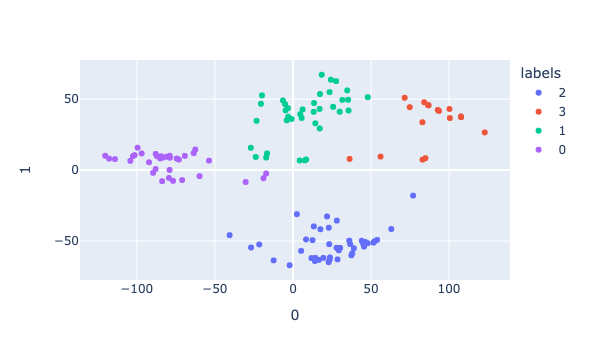

In [20]:
# 18S
scores_18S = pd.DataFrame(pca_results_18S["scores"])
scores_18S["labels"] = labels_18S
fig_18S = px.scatter(
    scores_18S,
    x = 0,
    y = 1,
    color = "labels"
)
fig_18S.show()

## Run multiple PCAs based on multiple random draws

#### This creates data frames with scores and loadings for each ASV in each random draw

#### This is a slow step that could be sped up!

In [10]:
num_reps = 100

pca_list_16S =  [md.doPCA(md.ranRelPct(asvs_16S)) for i in range(num_reps)]
pca_list_18S =  [md.doPCA(md.ranRelPct(asvs_18S)) for i in range(num_reps)]

#### Pull out scores
##### These are associated with each sample

In [12]:
pd.DataFrame(pca_list_16S)["scores"]

0     [[-56.794759678030104, -1.7885282812627532, 15...
1     [[-56.316531324298914, 2.536760558492138, 16.7...
2     [[-57.010736175158236, -1.1906523052877287, 15...
3     [[-54.93944988350951, 2.53514470253945, 16.324...
4     [[-55.6017997604475, 5.33815128243242, 15.6762...
                            ...                        
95    [[-56.242676856536455, 8.036664649191284, 14.4...
96    [[-57.44411850662497, -6.7093408565364205, 13....
97    [[-55.79410981521834, 7.765832220191618, 15.35...
98    [[-56.63355622325838, 7.240885943176597, 15.91...
99    [[-54.45744809937028, -4.8064207115796105, 16....
Name: scores, Length: 100, dtype: object

#### Summarize loadings for first component
##### Loading scores are associated with each ASV

In [13]:
# 16S
loadings_16S = [x["loadings"] for x in pca_list_16S]

smry0_16S = md.loadingSummary(
    loadings_16S, 
    pc = 0, 
    asv_labels = 
    asvs_16S.transpose().columns.values,
    z_thresh = 3,
    pct_outlier_thresh = 0.95
)

In [14]:
loadings_18S = [x["loadings"] for x in pca_list_18S]

smry0_18S = md.loadingSummary(
    loadings_18S, 
    pc = 0, 
    asv_labels = 
    asvs_18S.transpose().columns.values,
    z_thresh = 3,
    pct_outlier_thresh = 0.95
)

#### Positive loading ASVs on the first component (16S)

In [16]:
smry0_16S['positive'].head(3)

,mean_loading,median_loading,mean_rank,median_rank,pct_outlier_IQR,pct_outlier_Z
ASV_72,0.048724,0.048899,7076.47,7077.0,1.0,1.0
ASV_15,0.046196,0.046199,7075.29,7076.0,1.0,1.0
ASV_89,0.044432,0.044641,7074.07,7075.0,1.0,1.0


#### Negative loading ASVs on the first component (16S)

In [17]:
smry0_16S['negative'].head(3)

,mean_loading,median_loading,mean_rank,median_rank,pct_outlier_IQR,pct_outlier_Z
ASV_2,-0.075493,-0.075388,1.08,1.0,1.0,1.0
ASV_27,-0.072152,-0.072222,2.12,2.0,1.0,1.0
ASV_32,-0.069268,-0.069051,3.35,3.0,1.0,1.0


## Summarize loadings for all components

#### This is a very slow step that could be sped up!

In [19]:
# 16S
smry_all_16S = [
    md.loadingSummary(
        loadings_16S, 
        pc = pc, 
        asv_labels = 
        asvs_16S.transpose().columns.values,
        z_thresh = 3,
        pct_outlier_thresh = 0.95
    ) for pc in range(len(loadings_16S))
]

In [22]:
# 18S
smry_all_18S = [
    md.loadingSummary(
        loadings_18S, 
        pc = pc, 
        asv_labels = 
        asvs_18S.transpose().columns.values,
        z_thresh = 3,
        pct_outlier_thresh = 0.95
    ) for pc in range(len(loadings_18S))
]

In [24]:
smry_all_16S[2]['positive'].head(3)

,mean_loading,median_loading,mean_rank,median_rank,pct_outlier_IQR,pct_outlier_Z
ASV_72,0.048724,0.048899,7076.47,7077.0,1.0,1.0
ASV_15,0.046196,0.046199,7075.29,7076.0,1.0,1.0
ASV_89,0.044432,0.044641,7074.07,7075.0,1.0,1.0


In [25]:
smry_all_16S[2]['negative'].head(3)

,mean_loading,median_loading,mean_rank,median_rank,pct_outlier_IQR,pct_outlier_Z
ASV_2,-0.075493,-0.075388,1.08,1.0,1.0,1.0
ASV_27,-0.072152,-0.072222,2.12,2.0,1.0,1.0
ASV_32,-0.069268,-0.069051,3.35,3.0,1.0,1.0


In [26]:
smry_all_18S[2]['positive'].head(3)

,mean_loading,median_loading,mean_rank,median_rank,pct_outlier_IQR,pct_outlier_Z
ASV_15,0.039276,0.039285,10475.00,10475.0,1.0,1.0
ASV_163,0.033035,0.033161,10471.82,10473.0,1.0,1.0
ASV_29,0.033003,0.032965,10472.11,10473.0,1.0,1.0


In [27]:
smry_all_18S[2]['negative'].head(3)

,mean_loading,median_loading,mean_rank,median_rank,pct_outlier_IQR,pct_outlier_Z
ASV_3,-0.035798,-0.035523,1.05,1.0,1.0,1.0
ASV_1,-0.033425,-0.033500,1.95,2.0,1.0,1.0
ASV_13,-0.029328,-0.029377,3.44,3.0,1.0,1.0


#### Extract the defining ASVs for the third component from the smry_all list

In [29]:
smry_all_16S[2]['metrics']['loadings'].head(3)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
ASV_72,0.053906,0.046194,0.056242,0.049464,0.045239,0.039541,0.048083,0.050631,0.046081,0.048950,...,0.050513,0.045867,0.050557,0.052524,0.053899,0.051235,0.053743,0.047769,0.052054,0.050484
ASV_15,0.044549,0.041594,0.041461,0.046474,0.044692,0.050816,0.044171,0.053228,0.049368,0.042837,...,0.045066,0.049177,0.049601,0.048361,0.048962,0.045100,0.047587,0.045671,0.041094,0.050604
ASV_89,0.047292,0.048937,0.037473,0.044677,0.041966,0.041197,0.046021,0.044024,0.043673,0.044596,...,0.047047,0.045560,0.045741,0.046174,0.042567,0.043326,0.038766,0.040407,0.044472,0.041815


### Loadings heat map

##### To do: import taxonomy list and link taxon names with ASVs. Group ASVs by phylum/class?

In [31]:
import plotly.io as pio
pio.renderers.default = 'iframe' # or 'colab' or 'iframe' or 'iframe_connected' or 'sphinx_gallery'

In [32]:
fig = px.imshow(smry_all_16S[0]['metrics']['loadings'])
fig.show()

In [33]:
fig = px.imshow(smry_all_18S[0]['metrics']['loadings'])
fig.show()

## 03. Hierarchical Clustering

### Cluster samples based on n_rep random draws and n_clust clusters

In [10]:
# 16S
n_clust = 8
n_rep = 10
 
cluster_samples_16S = [md.doClustering(md.ranRelPct(asvs_16S), 
                                       n_clust) for i in range(n_rep)]
cluster_samples_16S = pd.DataFrame(cluster_samples_16S).transpose()
cluster_samples_16S.head(3)

,0,1,2,3,4,5,6,7,8,9
0,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1


In [11]:
# 18S
n_clust = 8
n_rep = 10
 
cluster_samples_18S = [md.doClustering(md.ranRelPct(asvs_18S), n_clust) for i in range(n_rep)]
cluster_samples_18S = pd.DataFrame(cluster_samples_18S).transpose()
cluster_samples_18S.head(3)

,0,1,2,3,4,5,6,7,8,9
0,0,7,7,7,7,7,7,7,7,0
1,0,4,3,3,3,3,3,3,3,0
2,0,4,3,3,3,3,3,3,3,0


### Assign n_clusters based n_rep draws of ASV df and return percent of draws that had same relative cluster assignments

In [12]:
import itertools

In [16]:
%%time
# Code to return pct of draws that had the same relative cluster assignment for 2 to [num_samples] clusters for n_rep replicates
# NB: This takes a long time to run!! 16 min for 10 replicates

n_rep = 10
num_clust_16S = np.arange(2, asvs_16S.shape[1] + 1)
pct_same_16S = [md.pctSame(asvs_16S, x, n_rep) for x in num_clust_16S]

CPU times: user 16min 13s, sys: 12.6 s, total: 16min 26s
Wall time: 16min 25s


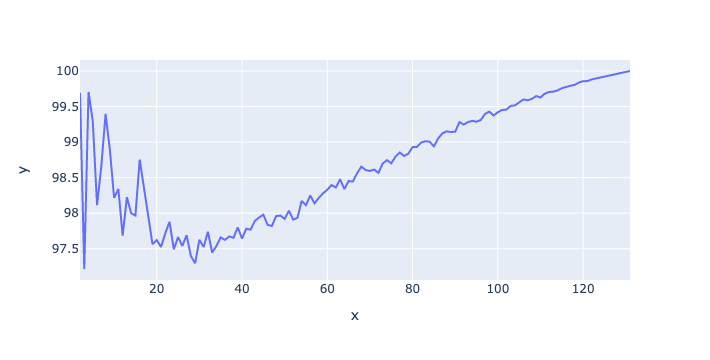

In [17]:
# Plot percent of draws the same for each number of clusters
px.line(x = num_clust_16S, y = pct_same_16S)

In [ ]:
%%time
# Code to return pct of draws that had the same relative cluster assignment for 2 to 62 clusters for n_rep replicates
# NB: This takes a long time to run for a modest number of replicates!!

n_rep = 1
num_clust_18S = np.arange(2, asvs_18S.shape[1] + 1)
pct_same_18S = [pctSame_new(asvs_18S, x, n_rep) for x in num_clust_18S]

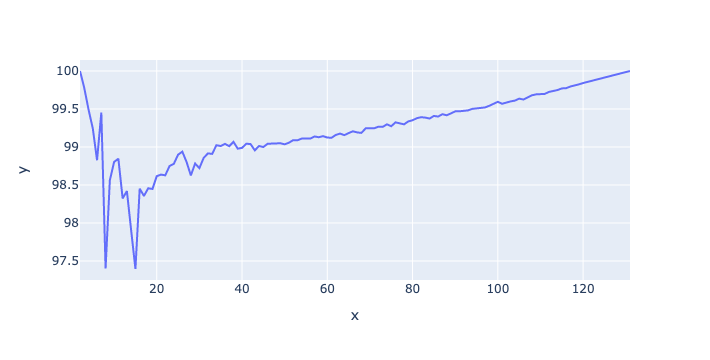

In [35]:
# Plot percent of draws the same for each number of clusters
px.line(x = num_clust_18S, y = pct_same_18S)

In [ ]:
# Plot percent of draws the same for each number of clusters
px.line(x = num_clust_16S, y = pct_same_16S)

### Now we have the "answer" for how many clusters is appropriate for our data set, and we can run the PCAs with labels from that number of clusters